# 决策树

**相当于多层嵌套的if-else语句**

### 如何确定最合理最有用的决策树？如何评价一个判断依据的有用性？
经验数据是否有用，取决于数据中各分类之间是否相差悬殊。

**基尼系数：1-（A比例^2 + B比例^2）**（A，B为数据集中的类别）
   * 基尼指数越低，经验数据集越有用
   * 基尼指数等于0.5时，表示完全无用

**信息熵:-（A比例 * log2A比例 + B比例 * log2B比例）**

信息熵公式更准确，但是在数据集很大的情况下，sklearn默认选择基尼系数（更快）

#### 决策树建立就是一个不断计算信息熵，不断优化信息熵的过程

## 以信息增益为导向，选最佳条件做分枝

1. 未作任何判断时的基尼系数为x
2. 选择一个依据进行分组之后
    1. 计算每个分组的基尼系数
    2. 根据每组数据量进行加权平均
    3. 得到该依据的平均基尼系数y
3. 信息增益 = x-y
    * 信息增益>0，则信息有用性增加，反之亦然
4. 重复对每个依据算出平均基尼系数和信息增益
5. 得到决策树的第一个节点（该节点的分支分别有各自的基尼系数z用于后续节点的计算）
    * 当信息增益等于0时，说明该分支已不需要再继续判断
6. 在剩下的依据中重复2-4步骤，但是以z为基础基尼系数
7. 到最后没有依据再进一步判断时，就采取投票原则（少数服从多数）


### 经典算法一：ID3决策树
**以信息熵作为分支判断基础**

### 经典算法二：C4.5决策树
**后剪枝等优化算法。使用信息增益率，抑制可取值太多的特征属性

### 经典算法三：CART决策树
**使用基尼系数，最多两个分支。SKlearn采用的算法**

## 决策树的过拟合
在数据集中存在一个特征没有意义，会造成决策树的过拟合问题。分支太多，分支太细。

### 剪枝
#### 预剪枝
每当做一层分支时，先用测试集测试效果（预测能力）是否提高，如果没有提高，该剪枝就不进行。

### 后剪枝
将一层分支去掉，有测试集测试看是否预测能力有所提高，提高就按照该方式剪枝，反之亦然。

### 强制限定最大高度等参数


## Sklearn构建决策树

所有树形sklearn算法都在tree子模块中。

要求作为特征的数据集必须是数字格式，所以对于文字类的特征数据，要对每一个类别进行编码。

当类别很多时，一个一个类别用replace手动编码效率太低，因此可以使用preprocessing里的OrdinalEncoder（序号编码器）对数据进行编码。

In [2]:
import pandas as pd
df = pd.read_excel('YaoGuai.xlsx')
df.head()

,姓名,武力,法术,法宝,背景
0,云程万里鹏,高,高,有,有
1,白骨精,低,低,无,无
2,黄袍怪,高,高,无,有
3,金角银角,中,低,有,有
4,红孩儿,中,高,无,无


In [8]:
df_train = df.iloc[:11, :]
df_test = df.iloc[11:, :]

In [6]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()

In [7]:
# df_train.replace('高',2).replace('低',0).replace('中',1)

,姓名,武力,法术,法宝,背景
0,云程万里鹏,2,2,有,有
1,白骨精,0,0,无,无
2,黄袍怪,2,2,无,有
3,金角银角,1,0,有,有
4,红孩儿,1,2,无,无
5,虎力大仙,0,2,无,无
6,玉兔精,0,0,无,有
7,九灵元圣,2,2,无,有
8,蝎子精,2,0,无,无
9,六耳猕猴,2,2,无,无


In [9]:
df_train

,姓名,武力,法术,法宝,背景
0,云程万里鹏,高,高,有,有
1,白骨精,低,低,无,无
2,黄袍怪,高,高,无,有
3,金角银角,中,低,有,有
4,红孩儿,中,高,无,无
5,虎力大仙,低,高,无,无
6,玉兔精,低,低,无,有
7,九灵元圣,高,高,无,有
8,蝎子精,高,低,无,无
9,六耳猕猴,高,高,无,无


In [10]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

x_train = enc.fit_transform(df_train.iloc[:, 1:4])

x_train

array([[2., 1., 1.],
       [1., 0., 0.],
       [2., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       [2., 1., 0.],
       [2., 0., 0.],
       [2., 1., 0.],
       [1., 0., 0.]])

In [14]:
# 了解编码规矩
enc.categories_

[array(['中', '低', '高'], dtype=object),
 array(['低', '高'], dtype=object),
 array(['无', '有'], dtype=object)]

In [16]:
dct.fit( x_train, df_train['背景'])


DecisionTreeClassifier()

In [18]:
df_test

,姓名,武力,法术,法宝,背景
11,九头虫,中,低,无,无
12,铁扇公主,低,低,有,无
13,牛魔王,高,高,无,无
14,奔波儿灞,低,低,无,无
15,黄眉大王,中,高,有,有
16,赛太岁,高,高,有,有
17,百眼魔君,高,低,无,无


In [20]:
x_test = enc.transform(df_test.iloc[:,1:4])
x_test

array([[0., 0., 0.],
       [1., 0., 1.],
       [2., 1., 0.],
       [1., 0., 0.],
       [0., 1., 1.],
       [2., 1., 1.],
       [2., 0., 0.]])

In [21]:
df_test['预测背景'] = dct.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_test

,姓名,武力,法术,法宝,背景,预测背景
11,九头虫,中,低,无,无,无
12,铁扇公主,低,低,有,无,有
13,牛魔王,高,高,无,无,有
14,奔波儿灞,低,低,无,无,无
15,黄眉大王,中,高,有,有,有
16,赛太岁,高,高,有,有,有
17,百眼魔君,高,低,无,无,无


In [23]:
# 画决策树
# graphviz

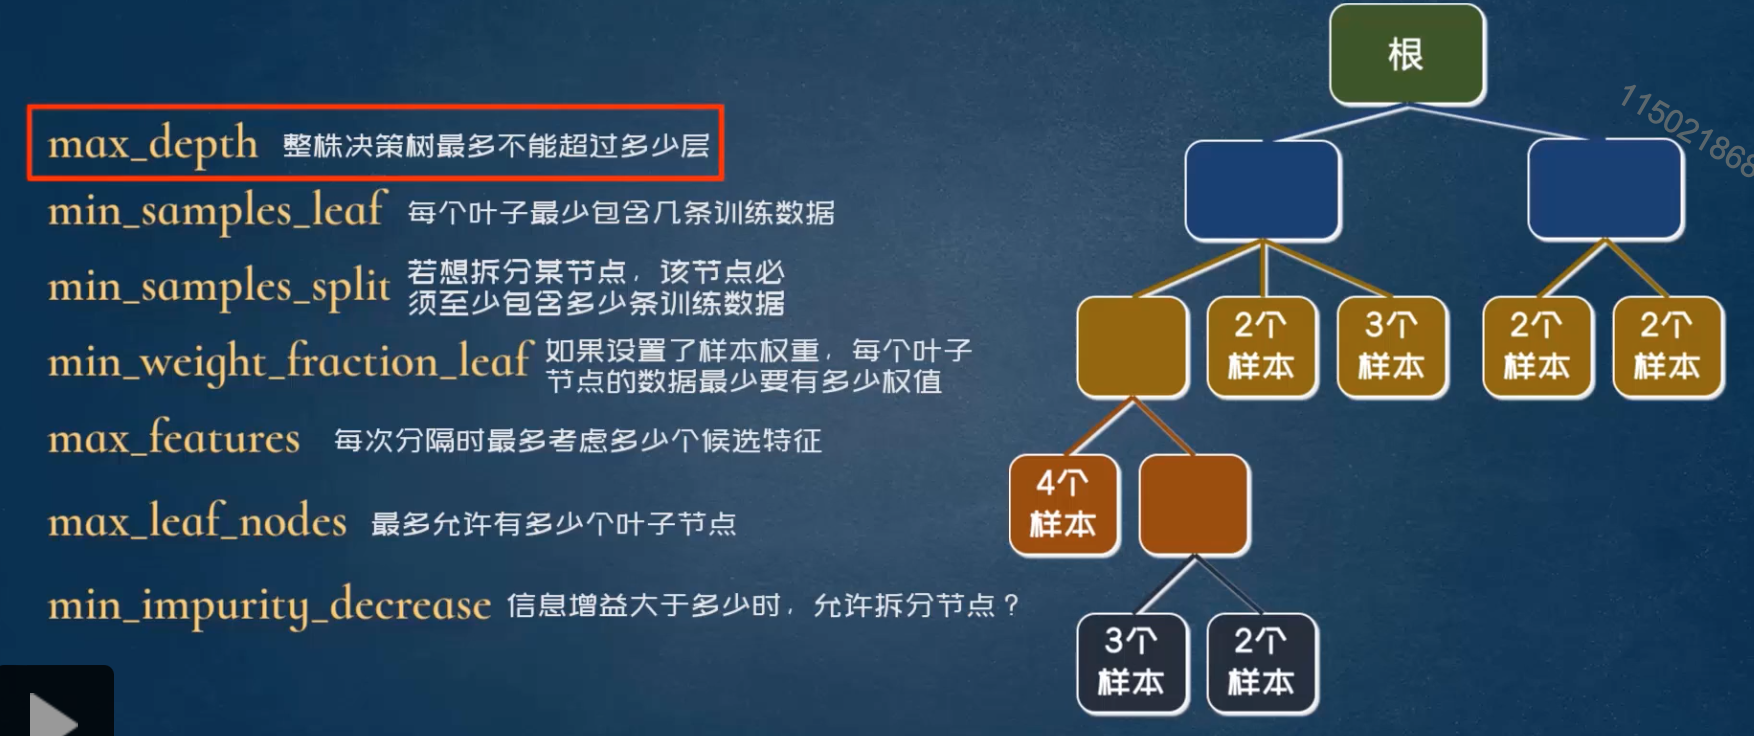

### 决策树处理连续性数字特征分类问题
Kaggle数据集：心脏病患者数据

In [26]:
df = pd.read_csv('心脏疾病数据集.csv')
df.head()

,年龄,性别,胸痛类型,静息血压,胆固醇,血糖,心电结果,最大心率,运动诱发心绞痛,ST段抑制,ST段斜率,荧光血管数,地中海贫血,诊断结果
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()

model.fit( df_train.iloc[:,:-1], df_train['诊断结果'])

y_predict = model.predict(df_test.iloc[:,:-1])

#将测试集真实诊断结果与model的预测结果进行比较评分，输出各类分值
print('Accuracy: ', accuracy_score(df_test['诊断结果'], y_predict))
print('Precision: ', precision_score(df_test['诊断结果'], y_predict))
print('Recall: ', recall_score(df_test['诊断结果'], y_predict))
print('F1 score: ', f1_score(df_test['诊断结果'], y_predict))



Accuracy:  0.7777777777777778
Precision:  0.7115384615384616
Recall:  0.8809523809523809
F1 score:  0.7872340425531914


## 随机森林

**训练出多棵决策树，所有决策树一起做决策。** 训练出来的决策树各有所长，最终集体投票决定决策。

方法：可重复抽样（有放回抽样）

集成学习，可抽样：bagging算法

如果数据集中数据很多，记录很多，很难找到一颗完美的决策树，及其消耗性能。为了节省性能，sklearn只选取部分特征进行筛选，导致每次的结果都不同。

joblib子模块
*from joblib import dump, load*

将模型保存成文件，可以永久储存，在之后需要用时只需要使用load就可以加载模型。

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

model = RandomForestClassifier()

model.fit( df_train.iloc[:,:-1], df_train['诊断结果'])

y_predict = model.predict(df_test.iloc[:,:-1])

#将测试集真实诊断结果与model的预测结果进行比较评分，输出各类分值
print('Accuracy: ', accuracy_score(df_test['诊断结果'], y_predict))
print('Precision: ', precision_score(df_test['诊断结果'], y_predict))
print('Recall: ', recall_score(df_test['诊断结果'], y_predict))
print('F1 score: ', f1_score(df_test['诊断结果'], y_predict))



Accuracy:  0.8333333333333334
Precision:  0.813953488372093
Recall:  0.8333333333333334
F1 score:  0.8235294117647058
